# Introduction to Plotting using Matplotlib
## Topics
 - Matplotlib API basics
 - Scatter plots & line plots
 - Histograms
 - Bar plots

Okay, there's a lot more to this than we can realistically cover in one lecture, but there are lots of things you can do to make really cool figures in Python. We're going to be using Matplotlib, which is a plotting library that took a lot of the plotting functionality from the popular MATLAB software, re-wrote it in Python, and (I have heard) made it about 10 times saner and easier to use.

Matplotlib has a ton of features and can be incredibly powerful, thus, we only have time to cover the basics. Our goal is to give you a good enough understanding of how everything is set up so that you can start on your own and teach yourself the rest of what you'll need. Fortunately, the inline documentation for Matplotlib is pretty good, and you can look at the [extensive gallery](http://matplotlib.org/gallery.html#api) of examples and figure out how to make similar plots with your own data.

---
## Informative Interlude: MATLAB-style vs Pyplot-style
There are two main styles of using Matplotlib: as a MATLAB-like state machine, or the object oriented Pyplot-style. Matplotlib is designed to closely resembly MATLAB, and to reproduce MATLAB's functionality in Python. Matplotlib contains a set of functions that alter the state of your figure much like MATLAB does. Under the hood, however, these functions are altering the properties of various Python objects. It is therefore possible to produce figures by referencing the objects directly - the Pyplot-style. When browsing the gallery, documentation, or help forums, you will see both styles used, although the MATLAB-style is more common.

We are going to be teaching you Pyplot-style, how to create plotting objects and work with them directly. While this method requires learning a little bit more about what is going on and is not as concise, there are a few reasons we teach it. First, I don't know MATLAB, and MATLAB-style makes no sense to me. It does a number of things that are contrary to the way the rest of Python works (global state, flat name-space, and implicit references). Therefore, when trying to learn Python, Pyplot-style is just more consistent. Second, while Pyplot-style works for simple figures, it becomes increasingly difficult to produce more complicated figures. The shortcuts and assumptions made in MATLAB-style obfuscate what is actually going on, so complicated figures may not turn out like you expect and it can be difficult to figure out why.

For more information on the different levels and sytles of Matplotlib see the [usage FAQ](http://matplotlib.org/faq/usage_faq.html).

---

Let's make our first plot! Let's say we have some data that's approximately a line, but there's some noise in it. Let's plot it:

In [2]:
%matplotlib inline

The above line tells iPython notebook to display created figures in the notebook, which is handy for these demonstrations

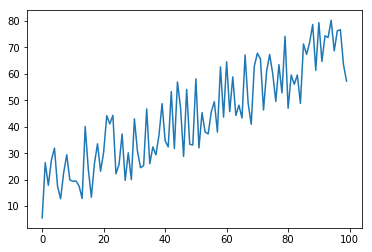

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(0,100)
y = 0.5 * x + 5 + 10*np.random.uniform(0,3,len(x))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

plt.show()

Not too hard, but what did we just do?

### *matplotlib.pyplot.**figure()***  
This instantiates a figure object, which you can fill with one or more subplot objects (e.g. Fig. 1A, Fig. 1B, Fig. 1C, etc). **figure()** has many optional arguments which set global properties of your figure, like the size and resolution. One of the most usefull is the **figsize** kwarg.

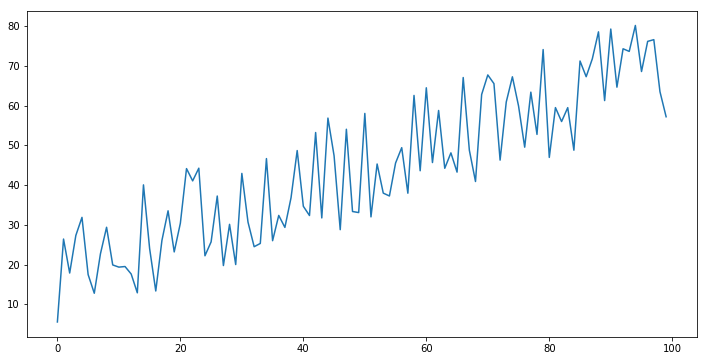

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
plt.show()

### *figure.**add_subplot()***  
This method of figure objects does exactly what it says on the tin; it instantiates an Axes object within the figure. In Matplotlib what we would think of as a graph, plot, or figure, is called an Axes, after the X and Y axes. Axes have many properties like x and y limits, a set of major (and sometimes minor) ticks for the x and y axes, an optional legend, and lots more data. Most of the time when you are making a figure you'll be working with the Axes. 

![Parts of a Figure](http://matplotlib.org/_images/fig_map.png "Parts of a Figure")

The [manual](http://matplotlib.org/api/figure_api.html#matplotlib.pyplot.figure) tells us to look at [matplotlib.pyplot.subplot()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot) for an explanation of the three mandatory arguments to **add_subplot()**. There we see they are **(nrows, ncols, plot_number)**. Note that plot_number starts at 1, not 0 like you would expect from Python. So to create a 4 x 1 array of plots we could do:

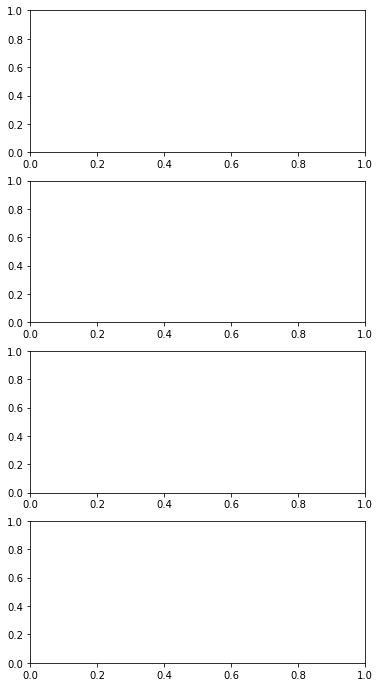

In [5]:
fig = plt.figure(figsize=(6, 12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27ff77ec90>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f27ff7b7f50>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f27ff228090>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f27ff20dad0>]


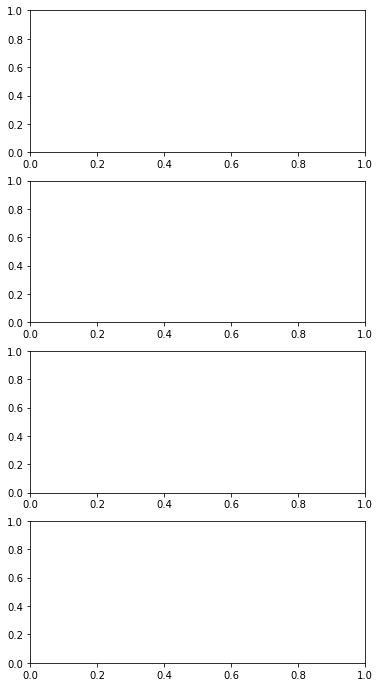

In [6]:
fig = plt.figure(figsize=(6, 12))

# Geez, that was tedious, lets just keep all these in a list.
axs = [fig.add_subplot(4,1,i+1) for i in range(4)]

print axs

### *Axes.**plot()***  
Lastly, we plot our data series using this aptly named method. We can consult the documentation to find out what other kinds of arguments we can give it.

In [7]:
ax1.plot?

You can see that there's a lot of different things you can do for something as simple as plotting... Markers, colors, lines. If you keep reading, you can even incorporate labels for the lines. Let's try this code, now, and see what it looks like:

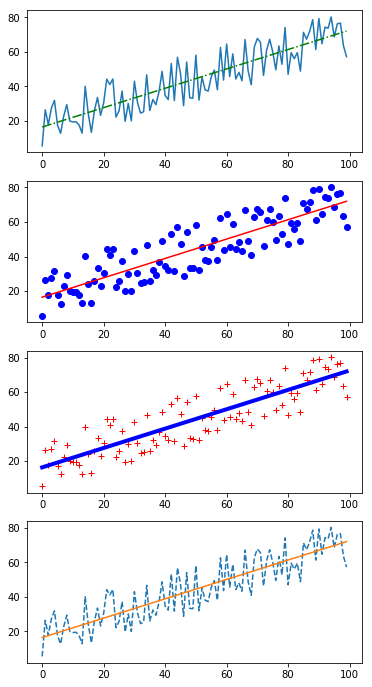

In [8]:
fig = plt.figure(figsize=(6,12))
axs = [fig.add_subplot(4,1,i+1) for i in range(4)]

# Plot the actual values on each subplot -- using different styles
axs[0].plot(x, y)
axs[1].plot(x, y, 'bo')
axs[2].plot(x, y, 'r+')
axs[3].plot(x, y, '--')

from scipy import stats
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)

# Plot trendline on each subplot
axs[0].plot(x, x * r_slope + r_int, 'g-.', label='Dashed-dotted Line')
axs[1].plot(x, x * r_slope + r_int, 'r-', label='Solid Line')
axs[2].plot(x, x * r_slope + r_int, 'b-', linewidth=4, label='Thick Line')
axs[3].plot(x, x * r_slope + r_int, '-', label='Regression Line')

plt.show()

### *Axes.**legend()***  
Hey, where are the labels? to incorporate these, we use the **legend()** method of our axes. Like *figure.**add_subplot()*** instantiates an Axes object, *Axes.**legend()*** instantiates a legend object for the indicated Axes object.

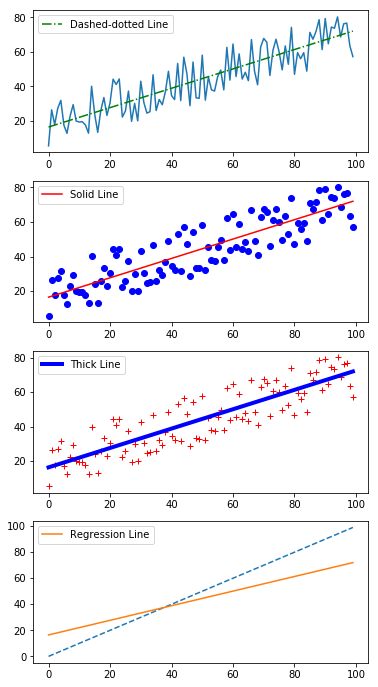

In [9]:
#### All this is the same as before. ####
fig = plt.figure(figsize=(6,12))
axs = [fig.add_subplot(4,1,i+1) for i in range(4)]

# Plot the actual values on each subplot -- using different styles
axs[0].plot(x, y)
axs[1].plot(x, y, 'bo')
axs[2].plot(y, 'r+')
axs[3].plot(x, '--')

from scipy import stats
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)

# Plot trendline on each subplot
axs[0].plot(x, x * r_slope + r_int, 'g-.', label='Dashed-dotted Line')
axs[1].plot(x, x * r_slope + r_int, 'r-', label='Solid Line')
axs[2].plot(x, x * r_slope + r_int, 'b-', linewidth=4, label='Thick Line')
axs[3].plot(x, x * r_slope + r_int, '-', label='Regression Line')
##########################################

# Add the legend for each plot
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')
axs[3].legend(loc='upper left')

# Or you could use a list comprehension for the legends:
#    legends = [ax.legend(loc='upper left') for ax in axs]

plt.show()

Or, if we decide that we don't like the labels that we gave it before, we can pass a list of labels to **legend()**. This case, we're plotting two lines, and each line will take the label corresponding to the string in the position in the list by the order in which it's plotted:

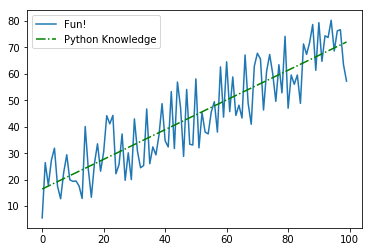

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

from scipy import stats
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)
ax.plot(x, x * r_slope + r_int, 'g-.', label='Dashed-dotted Line')

legend = ax.legend(['Fun!', 'Python Knowledge'], loc='upper left')
plt.show()

To see what other arguments we can give the **legend()** method, lets consult Python's help system:

In [11]:
ax.legend?

Lets try some of those tweaks:

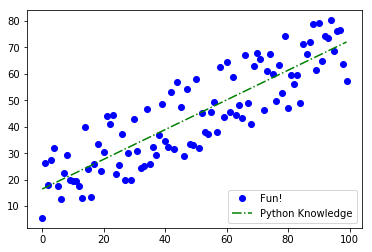

In [17]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'bo')

from scipy import stats
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)
ax.plot(x, x * r_slope + r_int, 'g-.', label='Dashed-dotted Line')

legend = ax.legend(['Fun!', 'Python Knowledge'], loc='lower right', numpoints=1, fancybox=True)
plt.show()

### matplotlib.pyplot.savefig()
Ok, so let's say you've spent all this time and you're reasonably satisfied with the figure you've created. To save the figure into a file, use the savefig function:

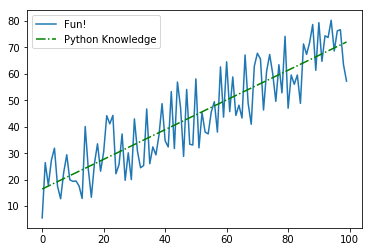

In [14]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

from scipy import stats
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)
ax.plot(x, x * r_slope + r_int, 'g-.', label='Dashed-dotted Line')

legend = ax.legend(['Fun!', 'Python Knowledge'], loc='upper left')

plt.savefig('firstfigure.png',format='png', dpi=600)
#OR
plt.savefig('firstfigure.pdf',format='pdf')

Check your 5.1 directory to see the new figures. Pretty cool! You can load your data, graph it in the way that you want, and then save that figure, ready to go, or import into Illustrator or any other image editor of your choice for further editing.

## Making our own plotting functions

You know how in papers, they will sometimes have a kind of fancy figure, and then they'll have things in the same style, but for a bunch of different ways of slicing and dicing their data? It's really pretty effective scientific story-telling. It allows them to connect all those figures together conceptually, and readers only have to look for the relevant differences.

The thing is, if you're going to actually make those figures, it can be annoying to tweak the plots in the same way every time. Fortunately, the whole point of this class is to learn how to take boring things that a person could do and automate them with the computer.

## Scatter Plots
Let's say we are interested in what the correlation is between gene expression between samples (to compare replicates, let's say, or even different treatment conditions). Let's create a function that will take a table of FPKM values (a measure of gene expression) and make a scatter plot of the FPKM values in one sample vs another.

As sample data we will use the file 'FPKM_table.tab'. You can less into the file and see that it is a tab-delimited file where each row is a gene, and each column represents the FPKM of that gene across different mutant conditions.

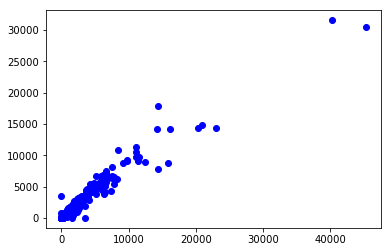

In [18]:
import matplotlib.pyplot as plt

# Function to parse and plot the data
def scatterFPKMs(tableFile, sample1, sample2):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    i1 = header.index(sample1)
    i2 = header.index(sample2)
    
    # Pull out the data series from each column
    x = []
    y = []
    for line in fh:
        line = line.strip().split()
        x.append(line[i1])
        y.append(line[i2])
        
    # Make a plot and plot the data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y, 'bo')
        
    plt.show()
 
scatterFPKMs("FPKM_table.tab",'WT','sir2')

Looks good! Except all the interesting business seems to be going on in the lower left hand corner. We should be able to see a clearer picture by setting the axes to log scale. We will also cut out very lowly expressed things by setting limits on the axes.

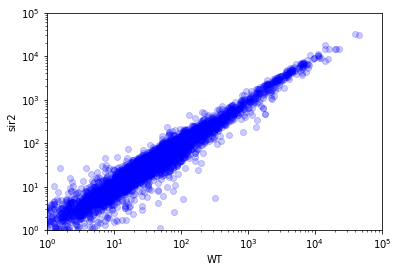

In [19]:
#!/usr/bin/env python
 
import matplotlib.pyplot as plt

# Function to parse and plot the data
def scatterFPKMs(tableFile,sample1,sample2):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    i1 = header.index(sample1)
    i2 = header.index(sample2)
    
    # Pull out the data series from each column
    x = []
    y = []
    for line in fh:
        line = line.strip().split()
        x.append(float(line[i1]))
        y.append(float(line[i2]))
    
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # Set log scales
    ax.set_yscale('log')
    ax.set_xscale('log')
    # Set limits on the axes
    # Because the scale is log, min must be >0
    ax.set_xlim(1, 100000)
    ax.set_ylim(1, 100000)
    
    # Plot the data
    ax.plot(x, y, 'bo', alpha=.2)
    
    ax.set_ylabel(sample2)
    ax.set_xlabel(sample1)
        
    plt.show()
 
scatterFPKMs("FPKM_table.tab",'WT','sir2')

## Histograms
Another thing that would be good to know is the overall distribution of expression values across all genes in the genome. Let's create a function that will take a sample name from this FPKM table and plot a histogram of the FPKM values in that sample:

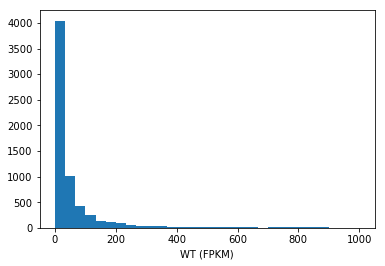

In [20]:
#!/usr/bin/env python
 
import matplotlib.pyplot as plt
 
# Function to parse and plot the data
# in this case, we are grabbing one sample
def histogramFPKMs(tableFile, sample):
    # Figure out which column we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    idx = header.index(sample)
    
    # Parse out the relevant column
    FPKMs = [float(line.strip().split()[idx]) for line in fh]
    #print(FPKMs)
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Plot the data as a histogram
    ax.hist(FPKMs,bins=30,range=(0,1000))
    ax.set_xlabel(sample + " (FPKM)")
    
    plt.show()
 
histogramFPKMs("FPKM_table.tab","WT")
 

You can set what bin intervals to use in your histogram with the **bins** keyword argument and set where you want the x-axis ticks (labels) to show up with the **set_xticks()** method. **bins** can be an integer, as above, specifying the number of equally sized bins to use, or it can be a list specifying the cutoff points for all the bins. **set_xticks()** takes a list of x values at which to place labels.

Finally, you can draw partially transparent graphs with the **alpha** keyword argument. **alpha** ranges from 0 to 1, with 0 being fully transparent and 1 being fully opaque. Most of the matplotlib functions know how to deal with this alpha property, so that can sometimes be useful when your plots start getting visually busy.

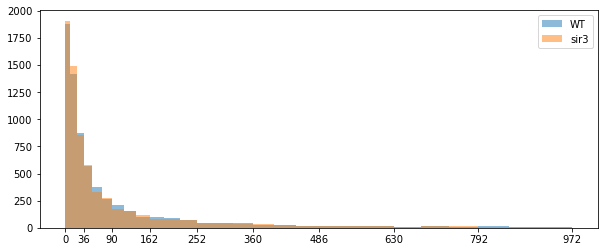

In [21]:
#!/usr/bin/env python
 
import matplotlib.pyplot as plt
 
# Function to parse and plot the data
# in this case, the samples plotted are supplied in a list
def histogramFPKMs(tableFile, samples):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    idxs = [header.index(sample) for sample in samples]
    
    # Parse out the relevant columns
    data = [[] for idx in idxs]
    for line in fh:
        line = line.strip().split()
        for i, idx in enumerate(idxs):
            fpkm = float(line[idx])
            data[i].append(fpkm)
    
    # Make a plot
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)
    
    # Just for fun, lets use bins that increase in size progressively.
    # [0, 10, 22, 36, 52, 70, ..., 972]
    bins = [10*(x)+2*sum(range(x)) for x in range(28)]
    # To make the labels readable we will only use every 3rd mark as a tick.
    ticks = [tick for i, tick in enumerate(bins) if i % 3 == 0]
    
    
    # Plot bars for each sample in partialy tranparent layers
    for sample, sample_name in zip(data, samples):
        ax.hist(sample, bins=bins, range=(0,1000), alpha=0.5, label=sample_name)
        ax.set_xticks(ticks)
        
    ax.legend(loc='upper right')
    
    plt.show()
 
histogramFPKMs("FPKM_table.tab", ['WT', 'sir3'])

As you can see above, because of the transparency, when one sample has more genes expressed at a given level the orange bar is stacked on top, while if the other sample has more genes expressed at that level the blue bar is stacked on top. Underneath, the orange and blue bars merge together.

## Bar Plots
Sometimes, despite the mountains of data you have, you just want to look at a simple bar plot of expression values for a single gene across multiple conditions. To make bar graphs matplotlib has a method, *Axes.**bar()*** that can do just that. It can be a little tricky to get your x-axis to work, however, because Matplotlib still assumes you have numerical data for both axes. You need to position your bars along a number range, then change the labels from numbers to your categorical labels. Let's say we just want to plot the expression value of a gene called "HMLALPHA2" in our FPKM_table.tab from before:

In [25]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


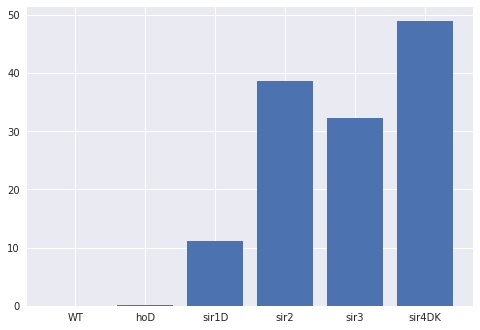

In [27]:
#!/usr/bin/env python
 
import matplotlib.pyplot as plt

print plt.style.available # This lists all the styles
plt.style.use('seaborn')

# Function to parse and plot the data
def barFPKMs(tableFile, gene):
    # Grab the header
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    
    # Grab the data for our gene
    # The gene names are in the first column
    for line in fh:
        if line.startswith(gene):
            data = line.strip().split()[1:]
            data = map(float, data) # Convert all data to a float
            break
    else:
        print "Gene not found"
        return 0
    
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # Matplotlib assumes you have numerical data for both axes
    # But for the X axis, we have categorical data
    # So we need to plug in a range of numbers to place the bars at
    x = range(len(data))
    
    # Now we change the labels for our categorical data
    labels = header[1:] # We don't need to label 'Gene' at -1
    
    ax.bar(x, data, align='center', tick_label=labels)
    
    plt.show()
    
barFPKMs('FPKM_table.tab', 'HMLALPHA2')

One final note: the [matplotlib documentation](http://matplotlib.org/contents.html) can be immensely helpful in aiding you to make a plot that fits your science needs. Not only is there a gallery of example plots, but there are also demo scripts that give you the code for how to make these plots. These demo scripts can easily be adapted for your own plotting purposes. No need to try and remember all of these functions and methods! Plus, unless you make the same kind of plot many many times, it would be virtually impossible to remember all of the different methods and functions that this plotting library contains.

---
# Exercises

__1. Dissecting and improving the plotting examples.__

a) Use the **barFPKMs()** function to plot the expression levels of these additional genes: MAK10, DDR2, HSP12.

b) Modify the **scatterFPKMs()** function to plot genes that vary in expression level between the two conditions by 2 fold or more in red, and other genes in black.

c) Modify the **histogramFPKMs()** function to plot the ratio of expression levels between two conditions, rather than their absolute expression levels.

d) Make the **barFPKMs()** function make more beautiful plots, following [Tufte's style](http://stackoverflow.com/questions/13701485/r-graphs-creating-tuftes-horizontal-bar-lines). That's grey bars, no lines, borders, grid, or ticks, except for implicit white lines within the bars. Hint: Google is your friend, as is the **dir()** function.

e) Modify the **barFPKMs()** function again to take an *axes* object as an argument and plot the bar plot on that axes object, rather than making an entirely new figure. Use this function four times to plot the expression levels of all four genes (HMLALPHA2, MAK10, DDR2, and HSP12) in a single figure. Be sure to label each subplot with the gene names.

__2. Plotting %A, %T, %G, %C, and %Ns across read position.__

The following is a function to open a fastq file containing sequencing reads and parse out the sequence identifiers, the raw sequence, and the quality scores for the bases called in the raw sequence. The function is a generator, which returns these three values every time it is looped through, just like a filehandle.

In [44]:
def parse_fastq(fastq_file):
    fh = open(fastq_file, 'r')
    
    while True:
        ID = fh.readline().strip()
        seq = fh.readline().strip()
        ID2 = fh.readline().strip()
        qual = fh.readline().strip()
        
        if not ID:
            break # end of file, finished successfully
    
        yield ID, seq, ID2, qual

And here is a function to calculate the frequency of each of the 4 nucleotides and "N" by read position for a fastq file. This metric can tell you if there is any bias in the %GC content of sequenced reads based on position. Note that this function uses the first function to parse the file.

In [ ]:
import numpy as np

def base_frequencies(fastq_file):
    fastq = parse_fastq(fastq_file)
    
    bases = ['A', 'T', 'C', 'G', 'N']
    
    # First initialize some arrays of the sequence length
    for ID, seq, ID2, qual in fastq:    
        seq = np.array(list(seq))
        readlength = len(seq)
        base_freqs = {base : (seq == base).astype(int) for base in bases}
        break
    
    # fastq is an iterator, and like filehandles,
    # iterators 'remember' their place
    for ID, seq, ID2, qual in fastq:    
        seq = np.array(list(seq))
        for base in bases:
            base_freqs[base] += seq == base
            
    # Find out the total number of reads
    totals = sum(base_freqs.values()).astype(float)
    
    # Calculate the percent frequencies of each base at all positions
    base_percents = {base : (base_freqs[base] / totals) for base in bases}
    
    return base_percents, readlength

Use these two functions to calculate the base frequencies of the reads in the 'illumina_reads.fastq' file.

a) Now that you have the frequencies, write a function to plot the % As, %Ts, %Gs, %Cs, and %Ns by read position as a line graph. Your final graph should show read position on the x-axis (1 - 100), and percent (%) on the y axis. The figure should contain five lines: one for %As, one for %Ts, one for %Cs, one for %Gs, and one for %Ns.

b) Add a figure title to your graph and labels for the x-axis ("Read Position") and y-axis "% Nucleotide". Add a legend for the five lines. Save the figure in the .png format. Hint: look up methods to do this using **dir(** *Axes* **)** (note that 'Axes' here is a variable referencing an Axes object). 

__3. Scatter plot practice__

Make a single figure that contains three separate scatter plots (each in different colors) that compares the FPKMs for the following samples (use the "fpkm_table.tab" file):  
1. WT versus hoD
2. WT versus sir4DK
3. hoD versus sir4DK

Remember to set the x and y axes to log scale and make both axes range from 1 to 10e5 (as in the lecture example)! Add lables to the Axes. Save this plot as an image file in the format of your choice. To see all the different possible formats, try *plt.savefig?* in ipython.

__4. Bar plots__

In the course files is 'exercise4.tab', which is a table that has FPKM values for one gene across wild type plus five mutant conditions, with three replicates for each measurement. You want to make a simple bar plot with error bars of this gene's expression across all genotypes.

(a) Google how to calculate the standard error of the mean using **scipy.stats** and apply the appropriate method to get the standard error of the mean (**sem**) for the gene's expression in each genetic condition.

(b) Write a function that takes the name of the tab delimited file and plots the mean measurement of the gene across all mutant conditions as a bar plot. Add error bars representing the standard error of the mean you calculated in part (a). Hint: read the documentation of *Axes**.bar()*** to figure out how to add error bars to your bar plot.